<a href="https://colab.research.google.com/github/aly202012/EnlighterJS/blob/master/mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('mushroom-classification')
jovian.set_colab_id('1_orzrZB-24SPpgGXNBY5T55ki0RaN3Zt')

     |████████████████████████████████| 71kB 3.5MB/s 


# mushroom-classification

With this data, we will use artificial neural networks to classify that data.
And also we will use algorithms for design using machine learning..

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="mushroom-classification")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alymohammedbakhit2020/mushroom-classification


'https://jovian.ai/alymohammedbakhit2020/mushroom-classification'

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#This is in order to ignore errors that may appear.
import warnings
warnings.filterwarnings("ignore")

In [66]:
data=pd.read_csv("/content/mushrooms.csv")

In [67]:
data.shape

(8124, 23)

In [68]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [69]:
list(data.columns)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [70]:
len(data.columns)

23

In [71]:
# We note that data has only one type, which is the object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Here we try to convert those meanings and letters into meaningful words by knowing which letters belong to which columns.

In [72]:
for i in data.columns:
  print(i, data[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Now we will convert those characters and values that have no meaning in the table into numeric values.

In [73]:
from sklearn.preprocessing import LabelEncoder
object_1=LabelEncoder()
# During the conversion process, we used the first projection.
for i in data.columns:
    data[i] = object_1.fit_transform(data[i])

In [74]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [75]:
grouped_data = data.groupby('class')
print(grouped_data)

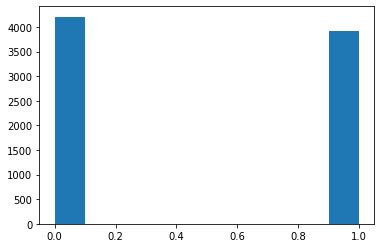

In [76]:
plt.hist(data["class"])
plt.show() 

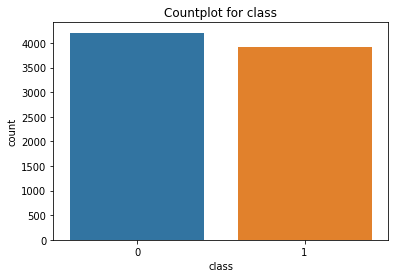

In [77]:
#This drawing looks better than the figure.
sns.countplot(data["class"])
plt.title("Countplot for class")
plt.show()

In [78]:
# Now we will calculate the correlation coefficient for each feature
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


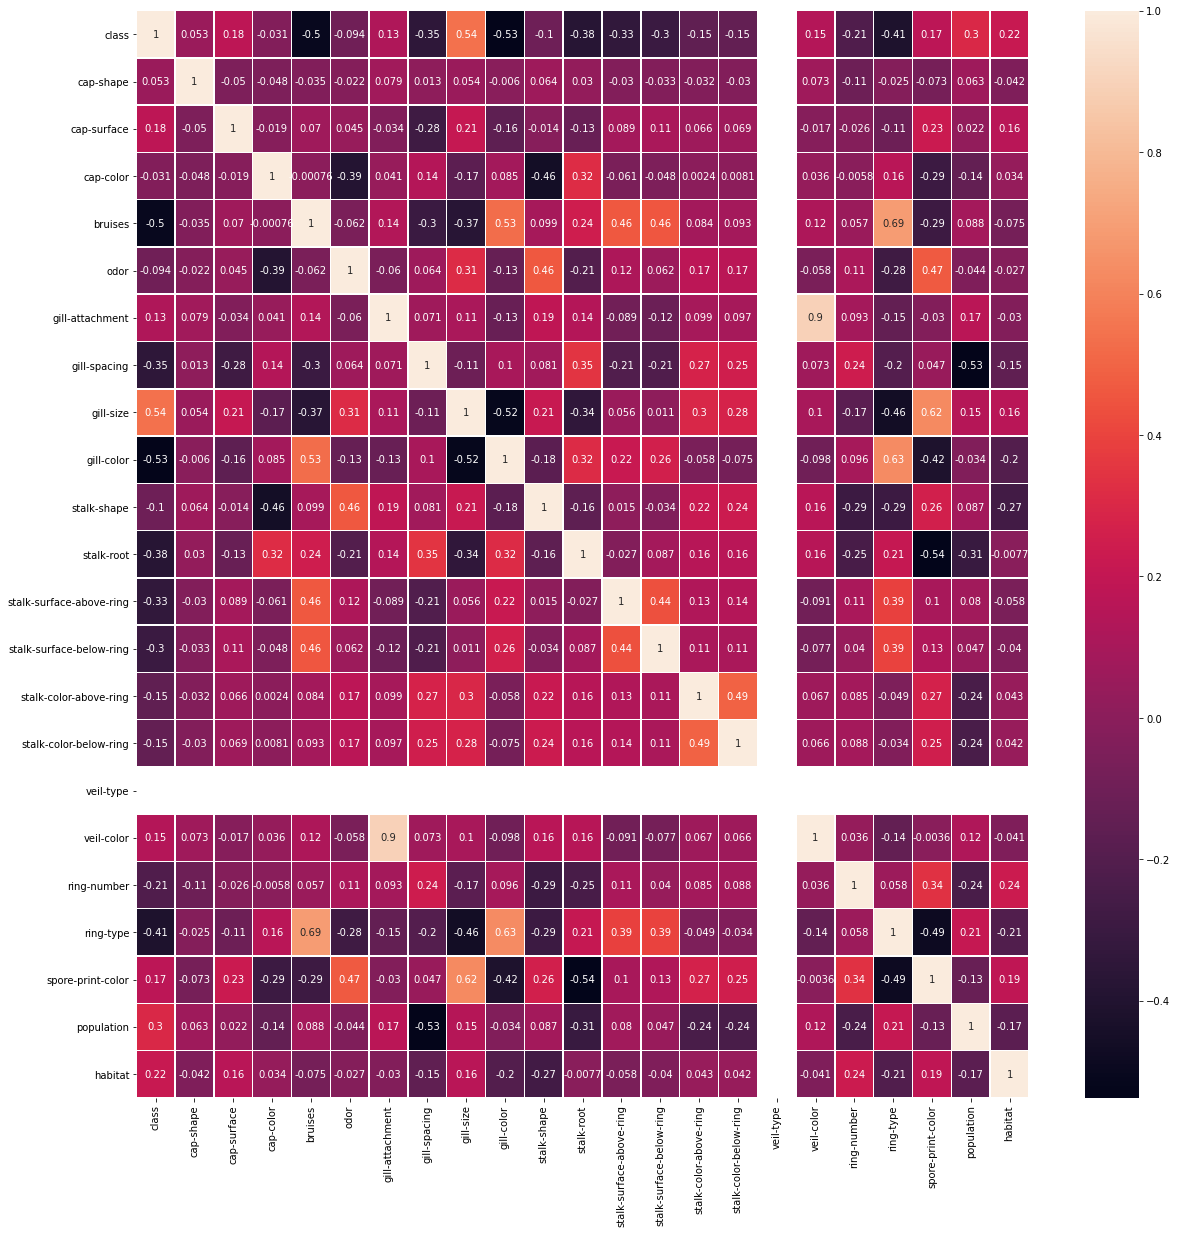

In [79]:
# Now we will draw a heat map.
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [80]:
# Here we have deleted one of the columns that has no connection with the rest of the data.
data.drop(['veil-type'], axis=1, inplace=True)

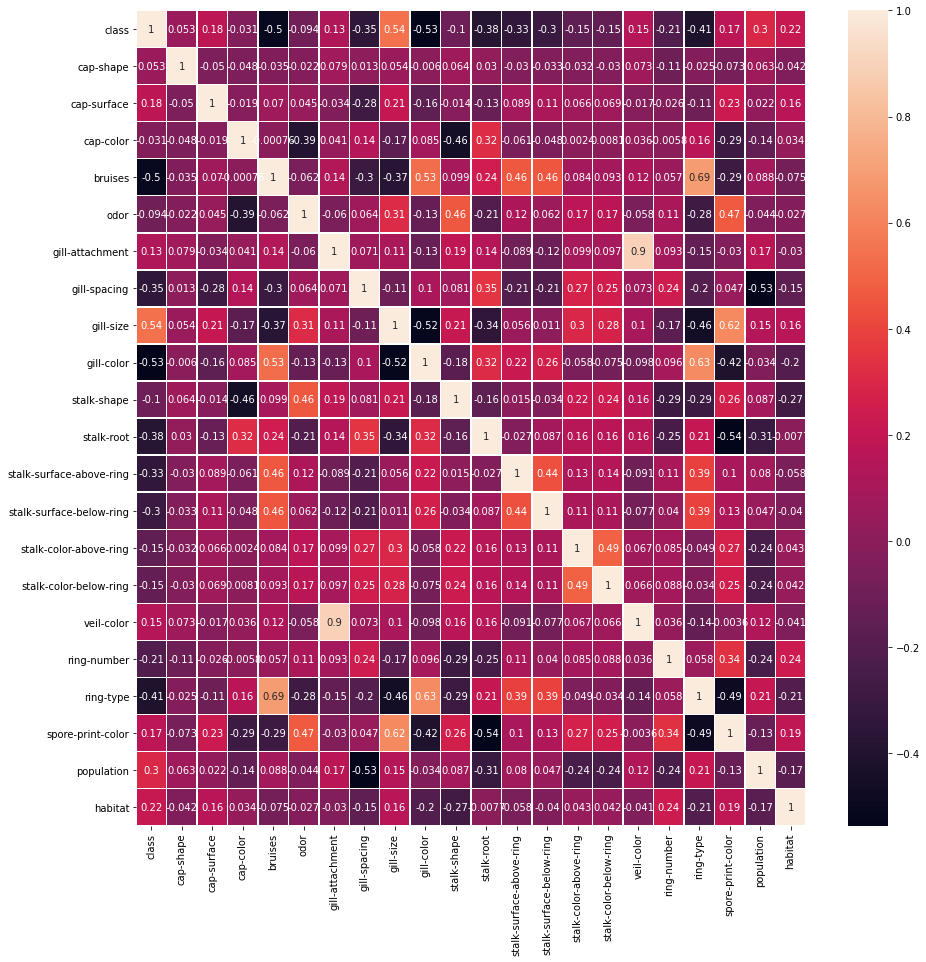

In [81]:
# Now we will draw a heat map.
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

Now here we will start the process of partitioning the data.
First, we will credit the results column over the rest of the columns.

In [82]:
target= data["class"].values
feature= data.drop(["class"],axis=1)

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size=0.2, random_state=11)

In [87]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6499, 21) (1625, 21) (6499,) (1625,)


In [89]:
# Now we are going to use a neural network for classification
# Here we will call the libraries that we need.
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # empty neural network
from keras.layers import Dense # layer constitution


In [98]:
def build_classifier():
    classifier = Sequential() # initialize neural network architecture
    classifier.add(Dense(units = 8, kernel_initializer="uniform", activation="relu", input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer="uniform", activation="relu")) #kernel_initializer: to initialize weights
    classifier.add(Dense(units = 1, kernel_initializer="uniform", activation="sigmoid")) #output layer
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs=70, batch_size=10)
# epoch = number of iteration, batch size : efers to the number of training examples utilized in one iteration.
accurisies = cross_val_score(estimator=classifier, X=x_train, y = y_train, cv = 2)
mean = accurisies.mean()
variance = accurisies.std()
print("Accuracy mean : ", str(mean))
print("Accuracy variance : ", str(variance))

Epoch 1/70
325/325 [==============================] - 15s 2ms/step - loss: 0.6443 - accuracy: 0.6868
Epoch 2/70
325/325 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.8755
Epoch 3/70
325/325 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.9146
Epoch 4/70
325/325 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9336
Epoch 5/70
325/325 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9345
Epoch 6/70
325/325 [==============================] - 0s 1ms/step - loss: 0.1949 - accuracy: 0.9478
Epoch 7/70
325/325 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9463
Epoch 8/70
325/325 [==============================] - 0s 1ms/step - loss: 0.1618 - accuracy: 0.9526
Epoch 9/70
325/325 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.9522
Epoch 10/70
325/325 [==============================] - 0s 1ms/step - loss: 0.1622 - accuracy: 0.952

In [99]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)

Epoch 1/70
130/130 [==============================] - 1s 4ms/step - loss: 0.6852 - accuracy: 0.6546 - val_loss: 0.5773 - val_accuracy: 0.7692
Epoch 2/70
130/130 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.8082 - val_loss: 0.3803 - val_accuracy: 0.8369
Epoch 3/70
130/130 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8530 - val_loss: 0.3382 - val_accuracy: 0.8615
Epoch 4/70
130/130 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8694 - val_loss: 0.2942 - val_accuracy: 0.8646
Epoch 5/70
130/130 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8803 - val_loss: 0.2732 - val_accuracy: 0.8862
Epoch 6/70
130/130 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8928 - val_loss: 0.2631 - val_accuracy: 0.9046
Epoch 7/70
130/130 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8955 - val_loss: 0.2489 - val_accuracy: 0.9138
Epoch 

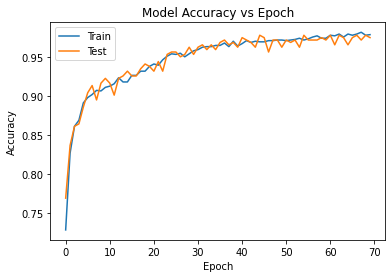

In [100]:
# Accurasy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

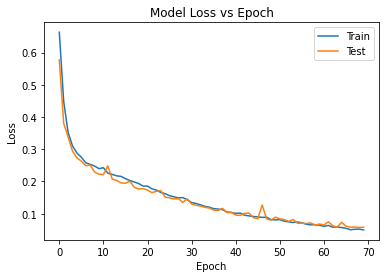

In [101]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Thank you very much, I learned a lot from you.
https://www.kaggle.com/feritebrargrler/ann-with-and-without-keras

In [102]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alymohammedbakhit2020/mushroom-classification


'https://jovian.ai/alymohammedbakhit2020/mushroom-classification'